In [47]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv('02_iplauction.csv')

In [2]:
# 1st step: understanding the data

In [6]:
df.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


In [7]:
df.tail()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
304,MS Dhoni,WK-Batter,India,NaN,1200.0,CSK,RETAINED
305,Moeen Ali,Allrounder,England,NaN,800.0,CSK,RETAINED
306,Ruturaj Gaikwad,Batter,India,NaN,600.0,CSK,RETAINED
307,Rishabh Pant,WK-Batter,India,NaN,1600.0,DC,RETAINED
308,Axar Patel,Allrounder,India,NaN,900.0,DC,RETAINED


In [8]:
df.shape

(309, 7)

In [9]:
df.describe()

,base price (in lacs),final price (in lacs)
count,151.000000,238.000000
mean,59.205298,368.067227
std,59.688337,449.070117
min,20.000000,20.000000
25%,20.000000,21.250000
50%,20.000000,150.000000
75%,75.000000,625.000000
max,200.000000,1850.000000


In [10]:
df.columns

Index(['name', 'player style', 'nationality', 'base price (in lacs)',
       'final price (in lacs)', 'franchise', 'status'],
      dtype='object')

In [12]:
df['player style'].unique()

array(['Bowler', 'Batter', 'Allrounder', 'WK-Batter'], dtype=object)

In [13]:
# Step2: Cleaning data

In [14]:
df.isnull().sum()

name                       0
player style               0
nationality                0
base price (in lacs)     158
final price (in lacs)     71
franchise                 71
status                     0
dtype: int64

In [38]:
new_df1=df.interpolate(method='linear')
new_df1.head()

C:\Users\hassa\AppData\Local\Temp\ipykernel_7000\2473410674.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  new_df1=df.interpolate(method='linear')


,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.000000,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,63.333333,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,106.666667,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.000000,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.000000,RR,SOLD


In [39]:
new_df1.isnull().sum()

name                      0
player style              0
nationality               0
base price (in lacs)      1
final price (in lacs)     0
franchise                71
status                    0
dtype: int64

In [41]:
new_df2 = new_df1.bfill()
new_df2

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,20.0,20.000000,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,63.333333,KKR,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,106.666667,KKR,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.000000,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.000000,RR,SOLD
...,...,...,...,...,...,...,...
304,MS Dhoni,WK-Batter,India,150.0,1200.000000,CSK,RETAINED
305,Moeen Ali,Allrounder,England,150.0,800.000000,CSK,RETAINED
306,Ruturaj Gaikwad,Batter,India,150.0,600.000000,CSK,RETAINED
307,Rishabh Pant,WK-Batter,India,150.0,1600.000000,DC,RETAINED


In [42]:
new_df2.isnull().sum()

name                     0
player style             0
nationality              0
base price (in lacs)     0
final price (in lacs)    0
franchise                0
status                   0
dtype: int64

In [44]:
new_df2.columns

Index(['name', 'player style', 'nationality', 'base price (in lacs)',
       'final price (in lacs)', 'franchise', 'status'],
      dtype='object')

In [45]:
# checking for outliers

In [46]:
new_df2['final price (in lacs)'].describe()

count     309.000000
mean      309.118123
std       416.061080
min        20.000000
25%        30.000000
50%        91.666667
75%       420.000000
max      1850.000000
Name: final price (in lacs), dtype: float64

<Axes: xlabel='final price (in lacs)', ylabel='Count'>

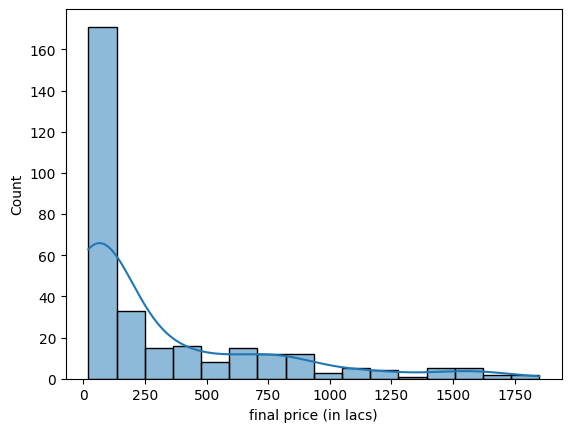

In [48]:
sns.histplot(new_df2['final price (in lacs)'], kde=True)

<Axes: xlabel='base price (in lacs)', ylabel='Count'>

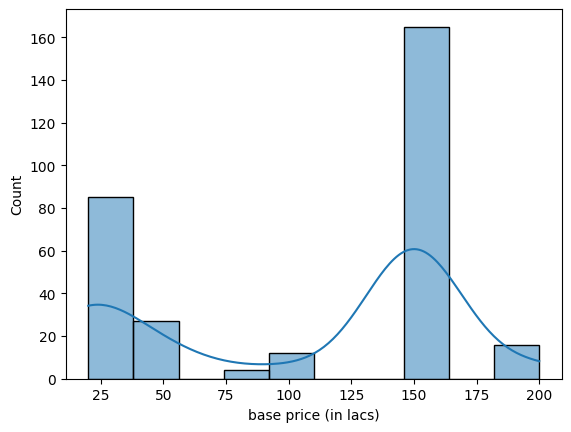

In [49]:
sns.histplot(new_df2['base price (in lacs)'], kde=True)

In [51]:
mean = new_df2['final price (in lacs)'].mean()
mean

np.float64(309.1181229773463)

In [52]:
std_dev = new_df2['final price (in lacs)'].std()
std_dev

np.float64(416.06107960132834)

In [64]:
mean - 4*std_dev

np.float64(-1355.126195427967)

In [65]:
mean + 4*std_dev

np.float64(1973.3624413826597)

In [66]:
df[new_df2['final price (in lacs)']<-1355.12]

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status


In [67]:
df[new_df2['final price (in lacs)']>1973.36]

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status


In [68]:
# no outliers detected

In [69]:
# step 3: relationship analysis

In [72]:
corelation = new_df2.select_dtypes(include=['number']).corr()

<Axes: >

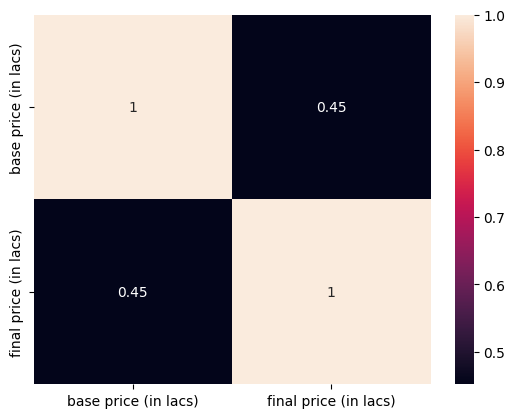

In [75]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

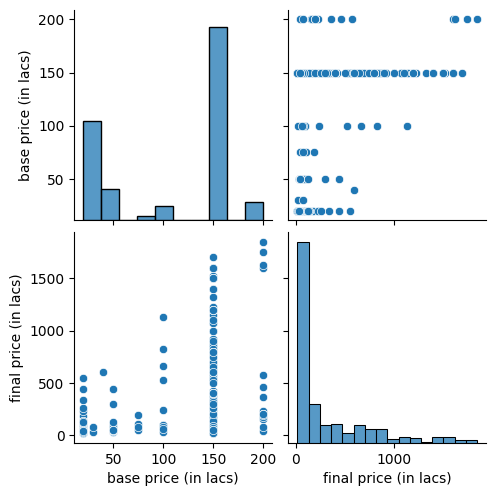

In [76]:
sns.pairplot(new_df2)

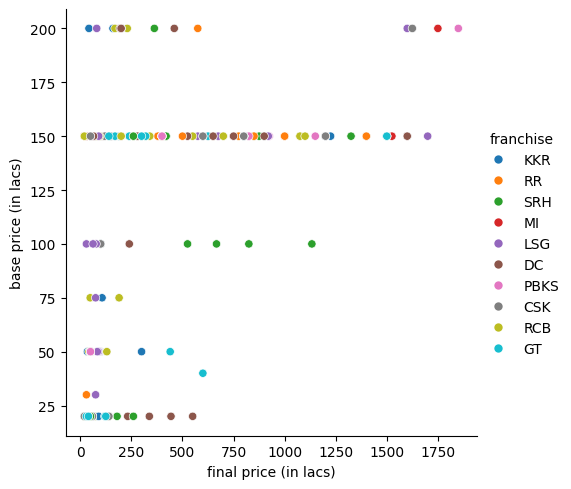

In [80]:
# Scatter Plot
sns.relplot(x='final price (in lacs)',y='base price (in lacs)',hue='franchise',data=new_df2)

<Axes: xlabel='final price (in lacs)', ylabel='Count'>

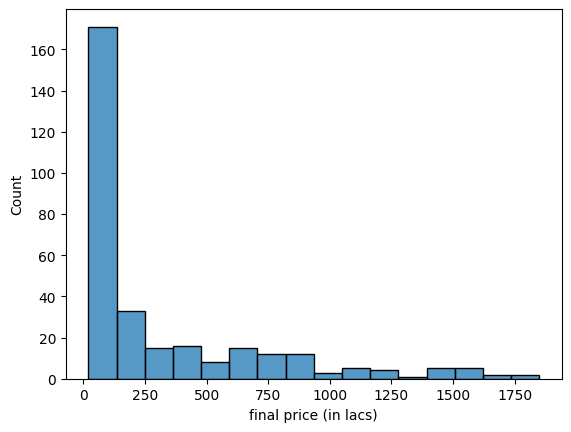

In [85]:
sns.histplot(new_df2['final price (in lacs)'])

<Axes: xlabel='base price (in lacs)', ylabel='Count'>

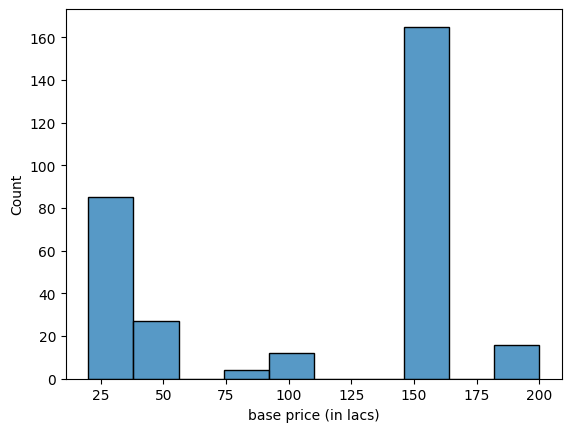

In [86]:
sns.histplot(new_df2['base price (in lacs)'])

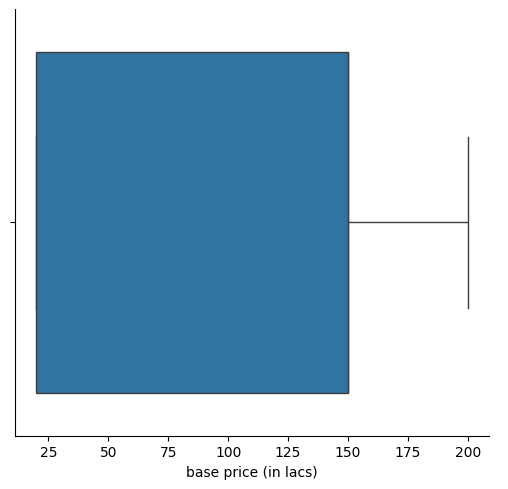

In [88]:
sns.catplot(x='base price (in lacs)', kind='box', data=new_df2)

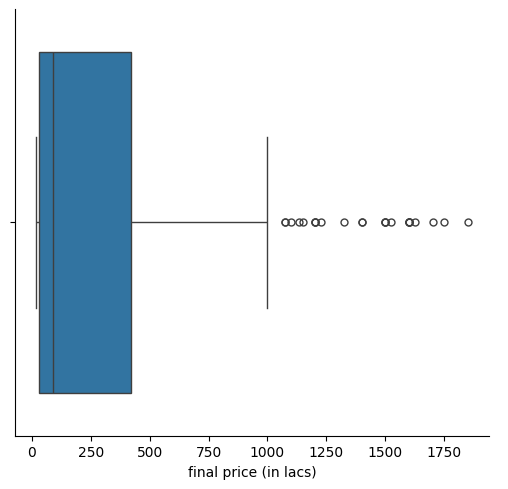

In [89]:
sns.catplot(x='final price (in lacs)', kind='box', data=new_df2)

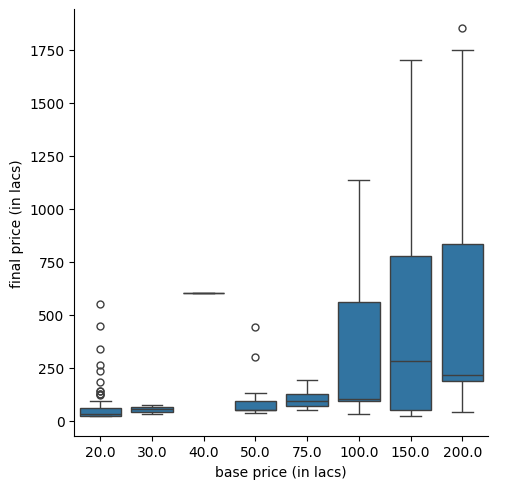

In [92]:
sns.catplot(x='base price (in lacs)',y='final price (in lacs)', kind='box', data=new_df2)

In [93]:
new_df2.to_csv('02_ipl_cleaned_data.csv', index=False)